In [1]:
#Import all the necessary package.
import nibabel as nib
import numpy as np
import nibabel as nib
import networkx as nx
import matplotlib.pyplot as plt
import robustReebConstruction as rc
import os
import pickle
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

In [2]:
def graph_vis(G, node_loc, streamlines):
    """Function to visualize the graph with node locations. 
    Input: Graph G and Node location hash map
    """
    # 3d spring layout
    pos = node_loc
    # Extract node and edge positions from the layout
    node_xyz = np.array([pos[v] for v in sorted(G)])
    edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])

    # Create the 3D figure
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111, projection="3d")

    # Plot the nodes - alpha is scaled by "depth" automatically
    ax.scatter(*node_xyz.T, s=100, ec="w",label = None)
    for i in range(len(streamlines)):
        xdata = []
        ydata = []
        zdata = []
        for j in streamlines[i]:
            xdata.append(j[0])
            ydata.append(j[1])
            zdata.append(j[2])
        ax.plot3D(xdata,ydata,zdata,color= '#eb7a30', lw = 2, alpha = 0.05);
    # Plot the nodes
    ax.scatter(*node_xyz.T, s=400, ec="w", color = 'r', zorder=100)
    edge_labels = nx.get_edge_attributes(G, "weight")
    # Plot the edges
    weight_labels = list(edge_labels.values())
    count = 0
    for vizedge in edge_xyz:
        wt = weight_labels[count]/max(weight_labels)*5
        ax.plot(*vizedge.T, color='#000000',
                lw = wt,
                zorder = 50,
               label = str(weight_labels[count]))
        count+=1


    def _format_axes(ax):
        """Visualization options for the 3D axes."""
        # Turn gridlines off
        ax.grid(False)
        # Suppress tick labels
        for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
            dim.set_ticks([])
        # Set axes labels
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("z")


    _format_axes(ax)
    fig.tight_layout()
    plt.axis("off")   
#     plt.legend()
    plt.show()

Constructing Reeb Graph for CP.trk


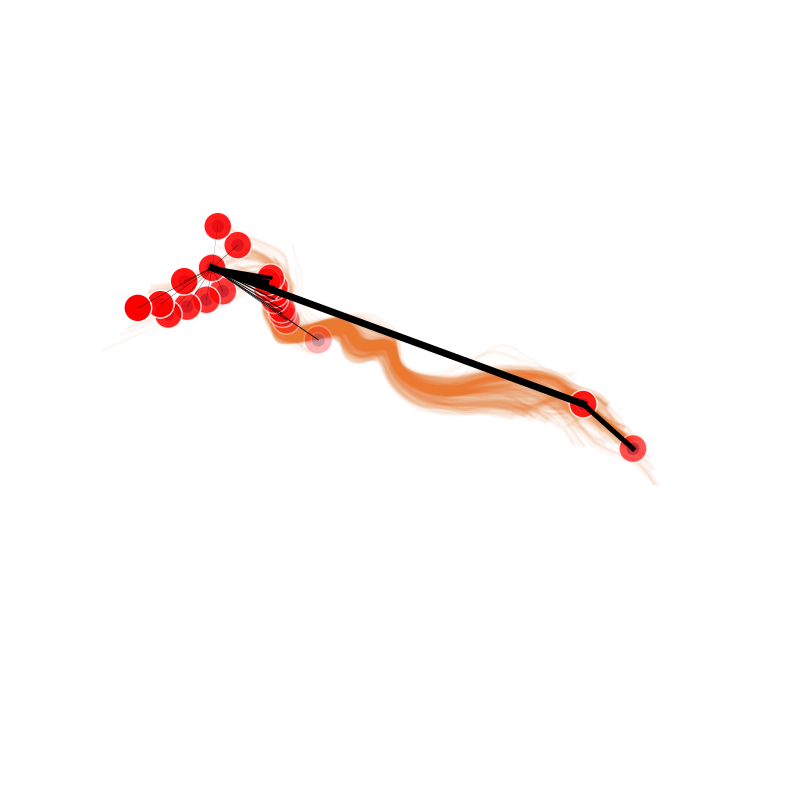

Constructing Reeb Graph for CA.trk


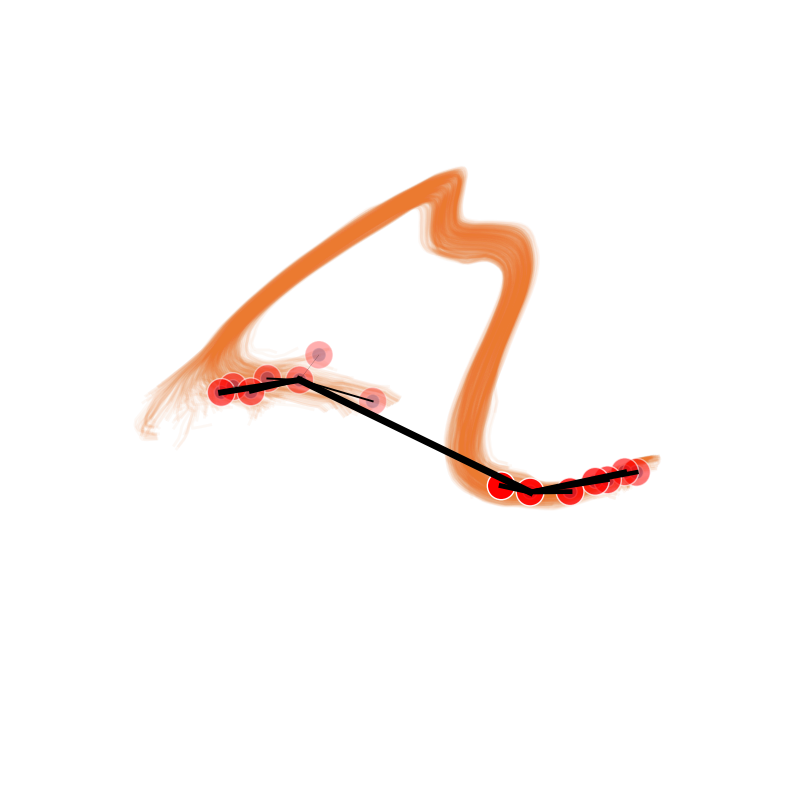

CPU times: user 13.4 s, sys: 1.35 s, total: 14.7 s
Wall time: 12.9 s


In [3]:
%%time
# Set the path to the folder where all .trk files are present
trkpathI = "SampleISMRMData/"
tracts = ["CP.trk","CA.trk"]
for file in tracts:
    print("Constructing Reeb Graph for", file)
    p_streamlines =  nib.streamlines.load(trkpathI+file)
    streamlines = p_streamlines.streamlines
    #set all the Reeb graph parameters
    # i) epsilon -- the distance between a pair of streamlines in a bundle that defines its sparsity;
    # ii) alpha -- the spatial length of the bundle that introduces persistence; 
    # iii) -- the bundle thickness.
    eps = 2.5
    alpha = 3
    delta = 5
    #Construct the Reeb graph for given streamlines and set of parameters
    h, node_loc = rc.constructRobustReeb(streamlines, eps, alpha, delta)
    graph_vis(h,node_loc,streamlines)